# Atividade 01 - Parte 01 - Inventário de emissões utilizando Python

Alunos: Sérgio Strack Junior

Sabrina de Melo


Para o seguinte estudo, Utilizamos o capítulo 2.1 da AP42, pois meu empreendimento emite poluentes a partir do processo de gaseificador. 

Empreendimento: Serrana Engenharia LTDA.

Resumo do processo: A gaseificação é definida como conversão de biomassa, ou qualquer combustível sólido (material carbonáceo sólido ou líquido), em um gás energético, através da oxidação parcial à elevada temperatura 500°C – 1400°C e pressão variável (atmosférica à 33 bar) (Morrin, Lettieri et al., 2011). Durante a gaseificação, a maior parte do material de alimentação é termicamente decomposto na forma de gás, porém pequenas quantidades de subprodutos são também formadas, incluindo alcatrão, carvão e cinzas.

- Gaseificadores com capacidade de 3 mil toneladas de RSU por mês
- Cada gaseificador trata, por dia, 45,3t de RSU e 2,5t de água contaminada e chorume. 
- Para isso utiliza 27,8t de ar atmosférico produzindo 6,3t de cinzas e 64,3t de GCDR.
- Entram no depósito 91,2t/dia de RSU, aproximadamente, 4 a 5 caminhões/dia.

Utiliamos códigos para encontrar nossa tabela de dados em nosso computador.

In [336]:
# Utilizando Pandas para abrir a planilha
import pandas as pd
import os

# Coletando o caminho da pasta que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

# Indicando nome do arquivo
chapterNumer = 2
subChapter = 2
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file)
print(fe)

i:\airpolution\tabelas\FE
chp_2_2.csv
                   Processos       PM       Hg        Ni        Pb   SO2  HCl
0             Nao controlado  12.6000  0.00280  0.003930  0.107000  1.73  3.2
1                     Reator   0.1050  0.00280  0.000056  0.001500  0.00  0.0
2  Sistema de Limpeza do gas   0.0295  0.00198  0.001610  0.001450  0.00  0.0
3      Reuperacao de energia   0.0352  0.00163  0.000135  0.000458  0.00  0.0


Gráficos referentes ao processos de emissão do empreendimento de estudo:

Considerando uma taxa de 45,3t de RSU por dia.

#TESTE1

Processos    Nao controladoNao controladoNao controladoNao ...
PM                                                   578467.41
Hg                                                     417.213
Ni                                                    259.6143
Pb                                                   5001.4824
SO2                                                    78369.0
HCl                                                   144960.0
dtype: object
1
2
3
4
5
6


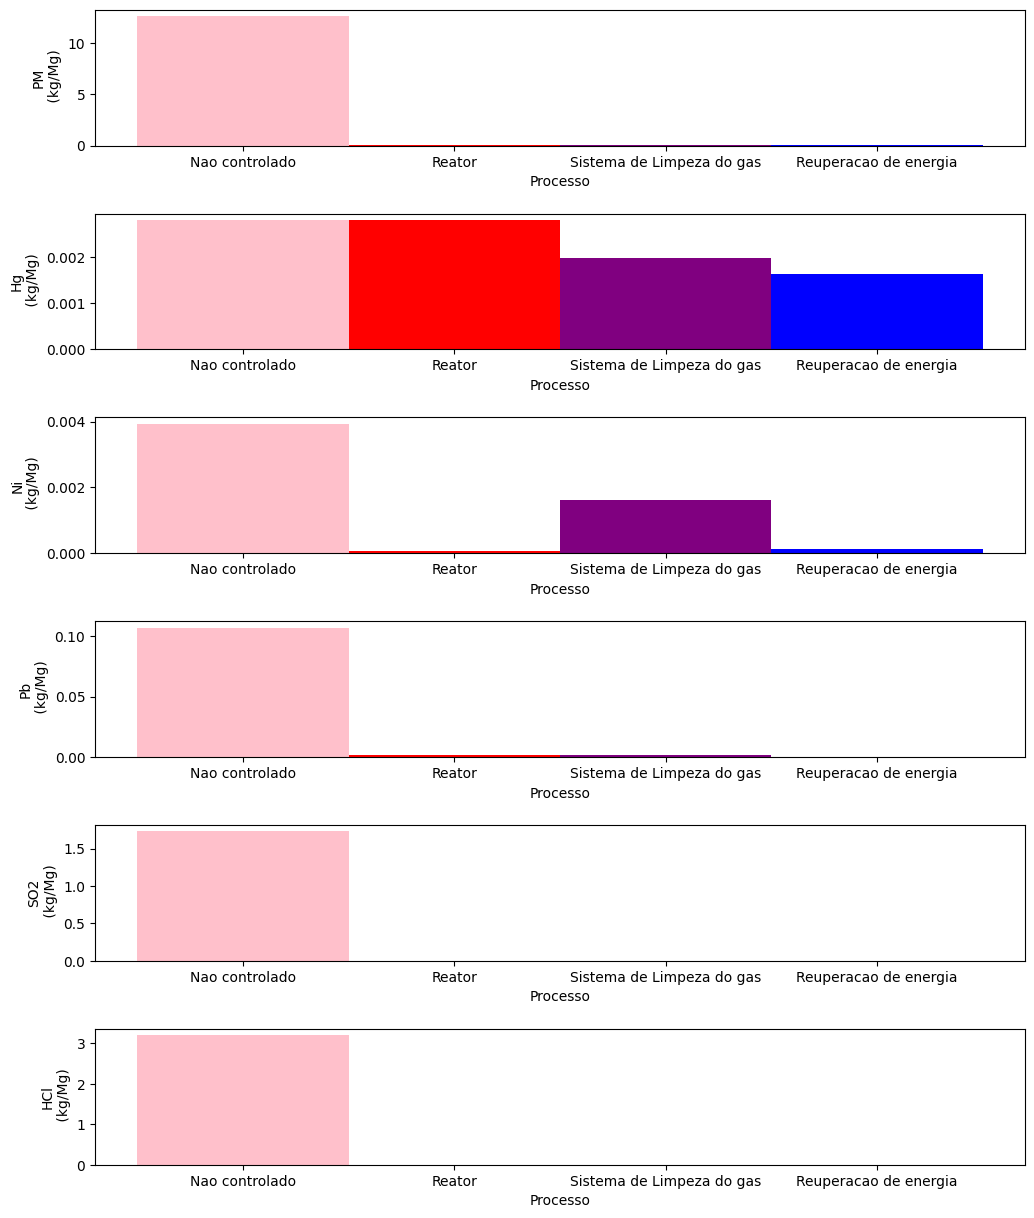

In [365]:
#plotando os fatores de emissão
import matplotlib.pyplot as plt

atv = 45300 # Kg Considerando uma taxa de atividade
emis = fe*atv

#somando dataframe
print(emis.sum())
largura_barra = 1

#sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,figsize=(12, 15))

#loop para preencher o subplot com os graficos de barra com os valores da planilha
for ii in range(1,len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Processos'],fe.iloc[:,ii], color=['pink', 'red','purple','blue','yellow'], width=largura_barra)
    ax[ii-1].set_xlabel('Processo', fontsize = 10)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg/Mg)', fontsize = 10)
    plt.subplots_adjust(hspace=0.5)
   
fig.savefig(cwd + '\\imagens\\barplot_fatorEmiss.png')

Processos    Nao controladoNao controladoNao controladoNao ...
PM                                                   578467.41
Hg                                                     417.213
Ni                                                    259.6143
Pb                                                   5001.4824
SO2                                                    78369.0
HCl                                                   144960.0
dtype: object


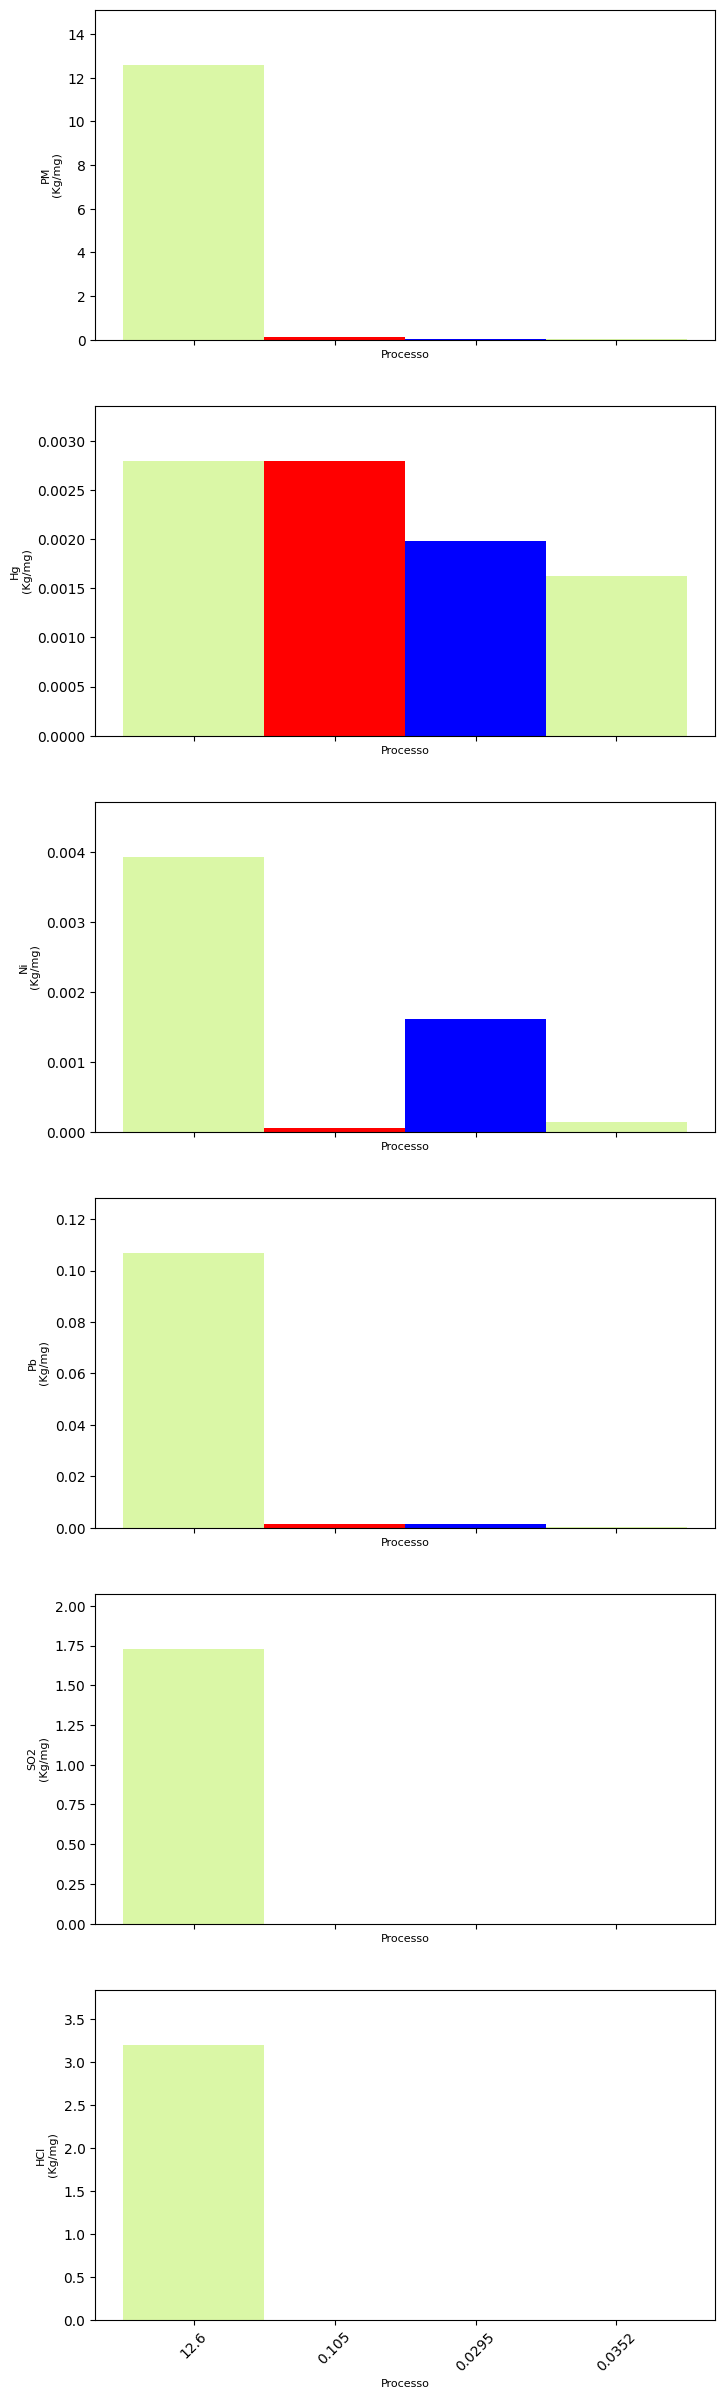

In [355]:
# Plotando os fatores de emissão
import matplotlib.pyplot as plt
import numpy as np

atv = 45300 # Kg Considerando uma taxa de atividade
emis = fe*atv

#somando dataframe
print(emis.sum())

# sharex significa compartilhar o eixo x
fig, ax = plt.subplots(len(fe.columns)-1, 1, sharex=True, figsize=(8, 30))
largura_barra = 1

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1, len(fe.columns)):
    ax[ii-1].bar(fe.index, fe.iloc[:, ii], color=['#DAF7A6', 'red', 'blue'], width=largura_barra)
    ax[ii-1].set_xlabel('Processo', fontsize=8)
    ax[ii-1].set_ylabel(fe.columns[ii] + '\n(Kg/mg)', fontsize=8)

    # Ajustando os rótulos do eixo x para melhorar a legibilidade
    plt.xticks(fe.index, fe['PM'], rotation=45)

    # Ajustando a faixa de escala no eixo y para incluir os valores corretos
    ax[ii-1].set_ylim(0,  fe.iloc[:, ii].max() * 1.2)  # Ajusta a faixa de escala % acima do valor máximo de emissão

fig.savefig(cwd + '\\imagens\\barplot_fatorEmiss.png')

Criando taxa de atividade aleatória com sazonalidade
Nesta sessão nós criaremos uma taxa de atividade de um empreendimento qualquer que contenha sazonalidade ao longo dos meses do ano. Esta variabilidade também deve conter uma componente aleatória.

Pergunta n° 2 - Elaborar uma função para ler a planilha dos fatores de emissão e estimar a emissão com base na taxa de atividade do empreendimento

Esse código retorna as emissões estimadas conforme a nossa taxa de atividade.

In [338]:
import pandas as pd

def estimar_emissao(taxa_atividade, arquivo_planilha):
    # Ler a planilha de fatores de emissão
    df = pd.read_csv(arquivo_planilha)
    
   # Calcular as emissões
    emissao0 = taxa_atividade * df['PM'].sum()
    emissao1 = taxa_atividade * df['Hg'].sum()
    emissao2 = taxa_atividade * df['Ni'].sum()
    emissao3 = taxa_atividade * df['Pb'].sum()
    emissao4 = taxa_atividade * df['SO2'].sum()
    emissao4 = taxa_atividade * df['HCl'].sum()

    # Retornar uma lista de emissões
    return [emissao0, emissao1, emissao2, emissao3, emissao4]


# 
taxa_atividade = 45300  # kg taxa de atividade
arquivo_planilha = r'I:\airpolution\tabelas\FE\chp_2_2.csv'  
emissoes_estimadas = estimar_emissao(taxa_atividade, arquivo_planilha)
print("Emissões estimadas:", emissoes_estimadas)


Emissões estimadas: [578467.41, 417.21299999999997, 259.6143, 5001.4824, 144960.0]


[59406.22268017 62852.02174    47085.59747863 67521.47057502
 46926.42713653 57672.83557503 37328.49722672 33468.99678722
 58154.34955397 31391.56627141 35512.02311136 39330.15464235
 50940.17340733 38153.30377225 37187.91446342 42720.81426764
 43025.12368621 23599.79469812 36986.38031881 43925.71168971
 33317.64054097 44258.28794059 48438.77606791 60680.18225033
 57746.00853209 34275.26981467 28481.16680774 22708.75637936
 40707.44164909 61398.03539957 29961.09818391 35638.39905011
 47257.083498   49549.9669295  47439.34833278 22764.89108973
 57563.46976949 63433.70087277 34100.88255213 28684.69620274
 57461.50147791 55720.48119275 58575.10817862 64278.16224812
 24654.10799354 46977.60528743 58395.04627957 45355.90134837
 47662.0457161  48318.02748028 23120.64675839 63614.27061941
 32198.68173076 23803.25182867 51344.78356605 48025.88191192
 28437.4949731  67872.74974197 40384.7212851  34699.53343003
 27234.21973486 46864.5388176  30091.68772686 29249.09673292
 55606.11916762 25678.78

Text(0, 0.5, 'Valores das concentrações')

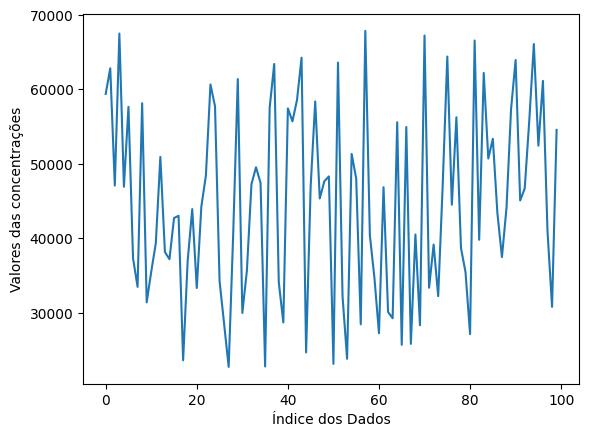

In [339]:
# Criando vetor de valores aleatórios com os valores de máxima e miníma das concentrações dos poluentes
import numpy as np
atvMax = 67950 #kg
atvMin = 22650 #kg
n = 100
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin #valores que representam a concentração dos poluentes
print(atv)

# Criando uma figura com os valores
fig, ax= plt.subplots()
ax.plot(atv)
ax.set_xlabel('Índice dos Dados')
ax.set_ylabel('Valores das concentrações')

In [340]:
# Criar um vetor com as datas
from datetime import datetime, timedelta

# Definindo a data inicial e final
data_inicial = datetime(2024, 1, 1)
data_final = datetime(2024, 12, 31)

# Definindo o passo (intervalo entre as datas)
passo = timedelta(days=1)

# Criando o vetor de datas
vetor_datas = []
data_atual = data_inicial
while data_atual <= data_final:
    vetor_datas.append(data_atual)
    data_atual += passo

# Exibindo o vetor de datas
for data in vetor_datas:
    print(data)

2024-01-01 00:00:00
2024-01-02 00:00:00
2024-01-03 00:00:00
2024-01-04 00:00:00
2024-01-05 00:00:00
2024-01-06 00:00:00
2024-01-07 00:00:00
2024-01-08 00:00:00
2024-01-09 00:00:00
2024-01-10 00:00:00
2024-01-11 00:00:00
2024-01-12 00:00:00
2024-01-13 00:00:00
2024-01-14 00:00:00
2024-01-15 00:00:00
2024-01-16 00:00:00
2024-01-17 00:00:00
2024-01-18 00:00:00
2024-01-19 00:00:00
2024-01-20 00:00:00
2024-01-21 00:00:00
2024-01-22 00:00:00
2024-01-23 00:00:00
2024-01-24 00:00:00
2024-01-25 00:00:00
2024-01-26 00:00:00
2024-01-27 00:00:00
2024-01-28 00:00:00
2024-01-29 00:00:00
2024-01-30 00:00:00
2024-01-31 00:00:00
2024-02-01 00:00:00
2024-02-02 00:00:00
2024-02-03 00:00:00
2024-02-04 00:00:00
2024-02-05 00:00:00
2024-02-06 00:00:00
2024-02-07 00:00:00
2024-02-08 00:00:00
2024-02-09 00:00:00
2024-02-10 00:00:00
2024-02-11 00:00:00
2024-02-12 00:00:00
2024-02-13 00:00:00
2024-02-14 00:00:00
2024-02-15 00:00:00
2024-02-16 00:00:00
2024-02-17 00:00:00
2024-02-18 00:00:00
2024-02-19 00:00:00


In [341]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month
df['Dia do Ano'] = df['Data'].dt.dayofyear

# Mostrar o DataFrame resultante
print(df)


          Data  Mes  Dia do Ano
0   2024-01-01    1           1
1   2024-01-02    1           2
2   2024-01-03    1           3
3   2024-01-04    1           4
4   2024-01-05    1           5
..         ...  ...         ...
361 2024-12-27   12         362
362 2024-12-28   12         363
363 2024-12-29   12         364
364 2024-12-30   12         365
365 2024-12-31   12         366

[366 rows x 3 columns]


In [342]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin 
df['atividade'] = atv
#print(atv)
print(df)
df.to_csv(r"I:\airpolution\tabelas\ativ.csv")


          Data  Mes  Dia do Ano     atividade
0   2024-01-01    1           1  33751.409078
1   2024-01-02    1           2  62778.292852
2   2024-01-03    1           3  26216.179383
3   2024-01-04    1           4  44209.781086
4   2024-01-05    1           5  42418.389561
..         ...  ...         ...           ...
361 2024-12-27   12         362  47387.199700
362 2024-12-28   12         363  34487.249976
363 2024-12-29   12         364  63570.625928
364 2024-12-30   12         365  48234.413482
365 2024-12-31   12         366  41282.444980

[366 rows x 4 columns]


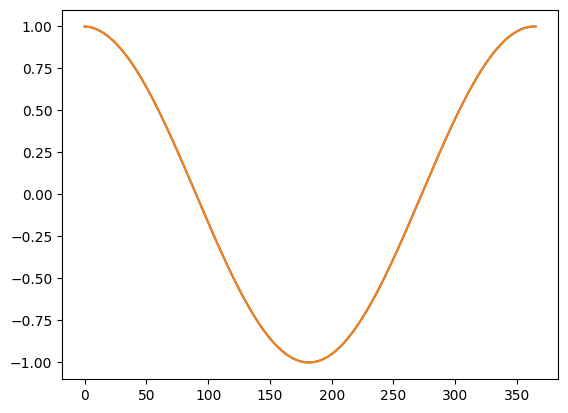

In [343]:
# Criando componente sazonal

sazonalidade = np.cos((2*np.pi)*df['Dia do Ano']/365) # taxa de resíduo queimados por diário
plt.plot(sazonalidade)
df['sazonalidade'] = sazonalidade 
plt.plot(sazonalidade)
df.to_csv(r"I:\airpolution\tabelas\ativ.csv")

42818.070395466784


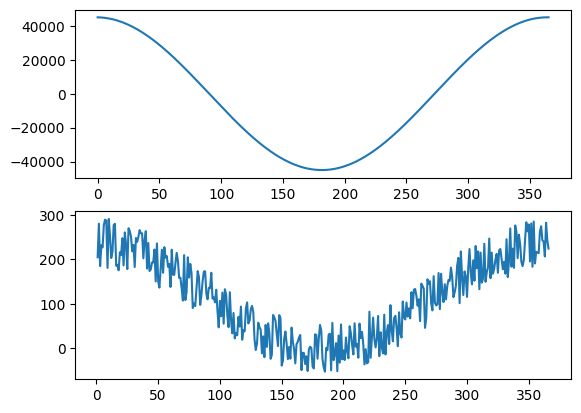

In [344]:
# Valores aleatórios com sazonalidade

df['aleatorio'] =  (atvMax - atvMin)*np.random.rand(n) + atvMin

df['aleatorioSazonal'] = (df['atividade'] +  df['sazonalidade']*df['atividade'].mean())*0.0026

fig,ax= plt.subplots(2)

ax[1].plot(df['Dia do Ano'], df['aleatorioSazonal'])
ax[0].plot(df['sazonalidade']*df['atividade'].mean())
print(df['aleatorioSazonal'].mean()*365)

#O df foi multiplicando por valor empírico para chegar próximo a média anual.

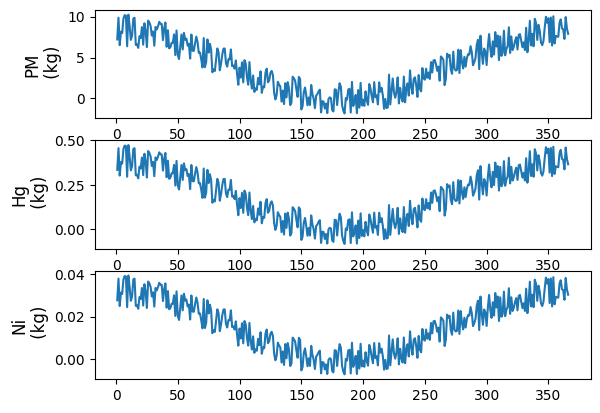

In [345]:
fig,ax= plt.subplots(3)
for ii in range (1,4):
    ax[ii-1].plot(df['Dia do Ano'], df['aleatorioSazonal']*fe.iloc[3,ii])
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg)', fontsize = 12)

#Gráfico abaixo está mostrando o comportamento de emissão do Gaseificador do empreendimento SALUMA.

Neste gráfico podemos ver que o pico emissão se dá no início do ano e no final, a onde o final do ano apresenta ainda sim uma maior concentração de poluentes gerados e emitidos.

c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['sazonal_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parame

Variabilidade da taxa de atividade: 0.15686983476465308


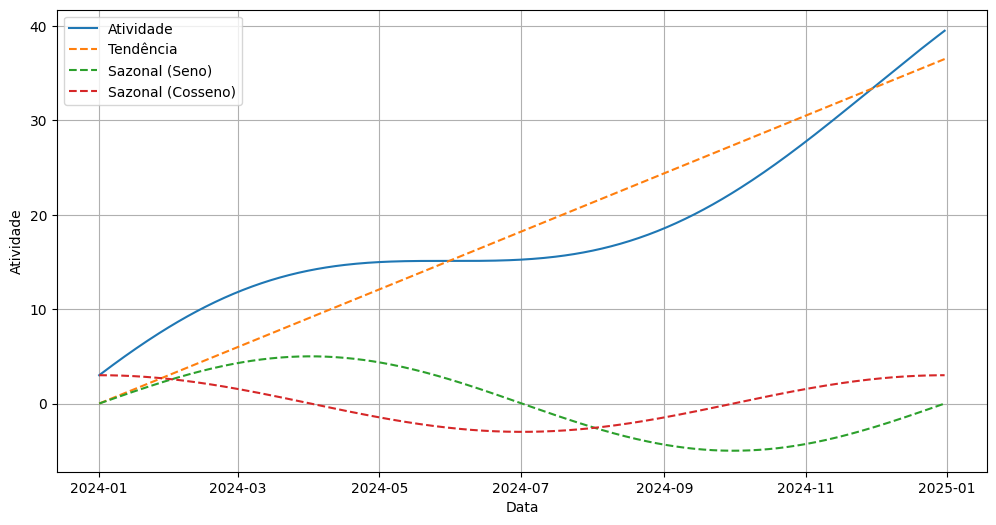

In [347]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Gerar dados de exemplo
np.random.seed(0)
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D') #Gera um intervalo de datas de 1 de janeiro de 2024 a 31 de dezembro de 2024, com frequência diária.
n = len(datas) #comprimento do intervalo de datas.
trend = 0.1 * np.arange(n)  # tendência linear multiplicando uma sequência numérica pelo valor 0.1.
sazonal_sin = 5 * np.sin(2 * np.pi * np.arange(n) / 365)  # componente sazonal seno
sazonal_cos = 3 * np.cos(2 * np.pi * np.arange(n) / 365)  # componente sazonal cosseno
noise = np.random.normal(loc=0, scale=2, size=n)  # ruído aleatório usando uma distribuição normal com média 0 e desvio padrão 2.
taxa_atividade = trend + sazonal_sin + sazonal_cos #Calcula a taxa de atividade como a soma da tendência, componente sazonal senoidal, componente sazonal cosenoidal e ruído.

# Criar DataFrame
data = pd.DataFrame({'Data': datas, 'Atividade': taxa_atividade}) #Cria um DataFrame com as datas e a taxa de atividade.
data.set_index('Data', inplace=True) 

# Ajustar o modelo SARIMA (Seasonal AutoRegressive Integrated Moving Average)
model = sm.tsa.SARIMAX(data['Atividade'], order=(1, 1, 1), sazonal_order=(1, 1, 1, 12)) # Define um modelo SARIMA (Seasonal AutoRegressive Integrated Moving Average) com uma ordem de diferenciação de 1, ordens ARMA de 1 e uma sazonalidade anual com ordens ARMA de 1
results = model.fit() # Ajusta o modelo aos dados.

# Calcular a variabilidade da taxa de atividade
variability = np.std(results.resid) #Calcula o desvio padrão dos resíduos do modelo ajustado.
print("Variabilidade da taxa de atividade:", variability) 

# Plotar os resultados de dados de taxa de atividade, tendência, componente sazonal senoidal e componente sazonal cosenoidal em um gráfico.
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Atividade'], label='Atividade')
plt.plot(data.index, trend, label='Tendência', linestyle='--')
plt.plot(data.index, sazonal_sin, label='Sazonal (Seno)', linestyle='--')
plt.plot(data.index, sazonal_cos, label='Sazonal (Cosseno)', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Atividade')
plt.legend()
plt.grid(True)
plt.show()

#O objetivo desse código é:
#- Gera uma série temporal de dados de exemplo para a taxa de atividade ao longo de um ano. A série temporal é composta por uma tendência linear, uma componente sazonal senoidal e uma componente sazonal cosenoidal;
#- Um modelo SARIMA é ajustado aos dados de exemplo. O modelo SARIMA é uma extensão do modelo ARIMA (AutoRegressive Integrated Moving Average) que inclui componentes sazonais. 
#Neste caso, o modelo SARIMA tem uma ordem de diferenciação de 1, ordens ARMA de 1 e uma sazonalidade anual com ordens ARMA de 1;
#-A variabilidade da taxa de atividade é calculada como o desvio padrão dos resíduos do modelo ajustado.

Spbre o gráfico: 
- O gráfico nos apresenta um crescimento com tendência a aumentar a cada ano que passa, ou seja, como o crescimento da atividade está aumentando a tendência de poluentes emitidos na atmosfera.